<a href="https://colab.research.google.com/github/harshaljanjani/everything-ml/blob/main/Data%20Analysis%20With%20Python/Seaborn%20Titanic%20And%20Tips%20Datasets%20Analysis%20(Day%2010).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Seaborn: Statistical Data Visualization Library**
### 1) Distribution Plots 
### 2) Categorical Plots 
### 3) Matrix Plots 
### 4) Grids 
### 5) Regression Plots 
### 6) Style And Color 

## **Titanic Dataset From Seaborn**

In [93]:
# https://seaborn.pydata.org/examples/index.html
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
sns.set_style('whitegrid')
sns.set_context('notebook')

In [95]:
titanic = sns.load_dataset('titanic')

In [96]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


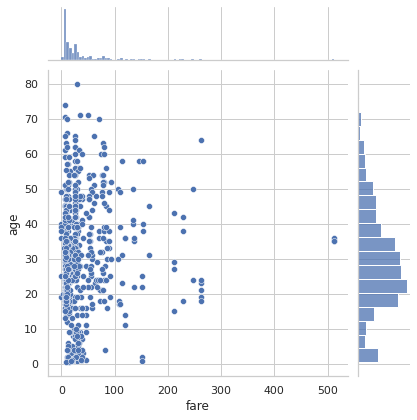

In [97]:
sns.jointplot(x='fare',y='age',data=titanic)

(0.0, 500.0)

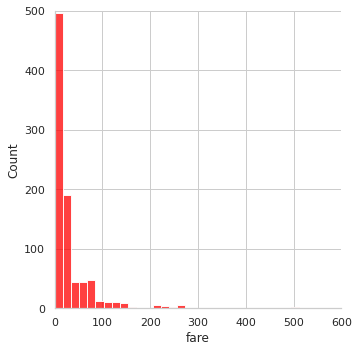

In [98]:
sns.displot(titanic['fare'],kde=False,color='red',bins=30)
plt.xlim(0, 600)
plt.ylim(0,500)

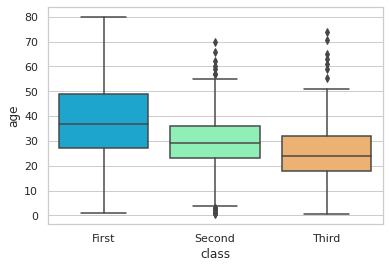

In [99]:
sns.boxplot(x='class',y='age',data=titanic,palette='rainbow')

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


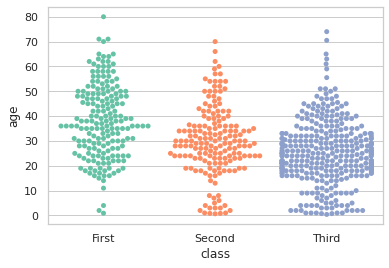

In [100]:
sns.swarmplot(x='class',y='age',data=titanic,palette='Set2')

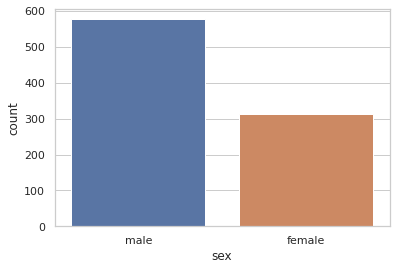

In [101]:
sns.countplot(x='sex',data=titanic)

Text(0.5, 1.0, 'titanic.corr() Heat Map')

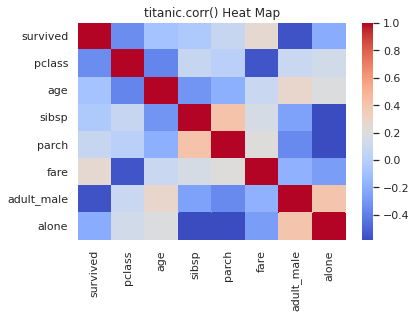

In [108]:
sns.heatmap(titanic.corr(),cmap='coolwarm')
plt.title('titanic.corr() Heat Map')

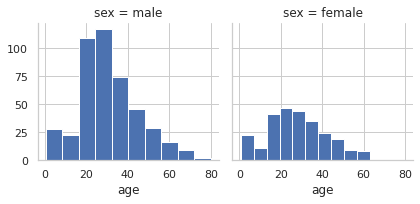

In [109]:
g = sns.FacetGrid(data=titanic,col='sex')
g.map(plt.hist,'age')

Text(0.5, 1.0, 'titanic.corr() Cluster Map')

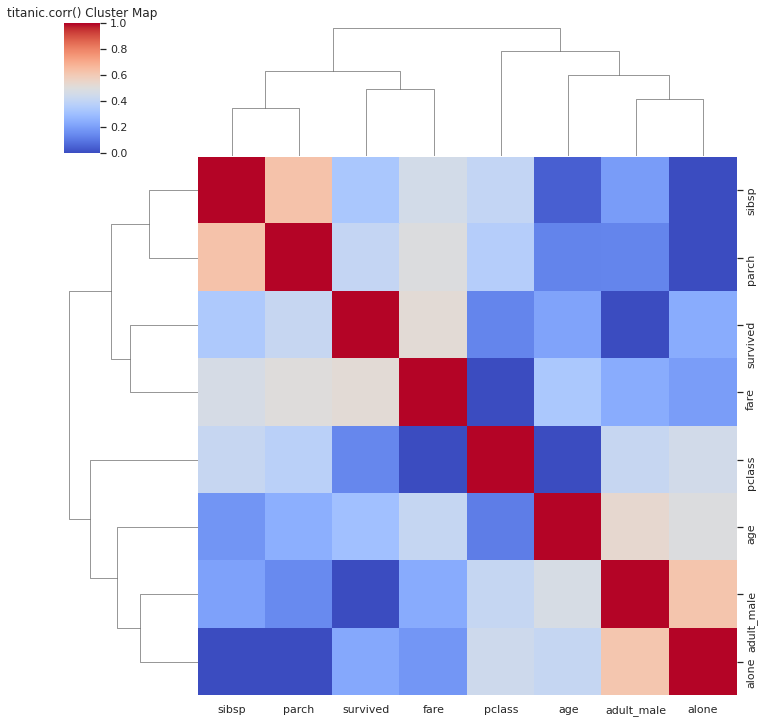

In [111]:
sns.clustermap(titanic.corr(),cmap='coolwarm',standard_scale=1)
plt.title('titanic.corr() Cluster Map')

## **Tips Dataset From Seaborn**

In [115]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


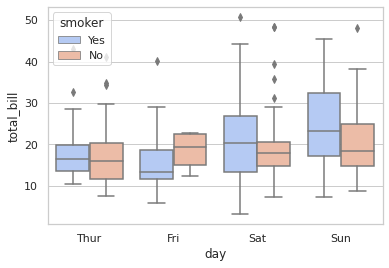

In [116]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

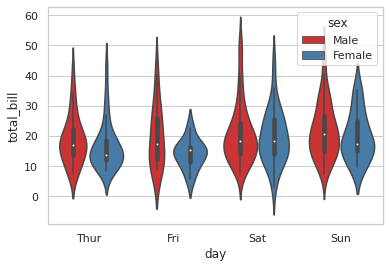

In [117]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',palette='Set1')

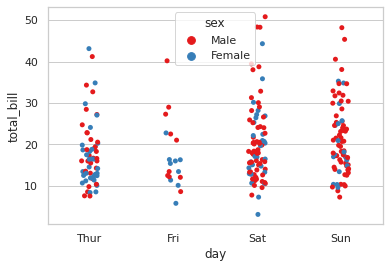

In [119]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1')

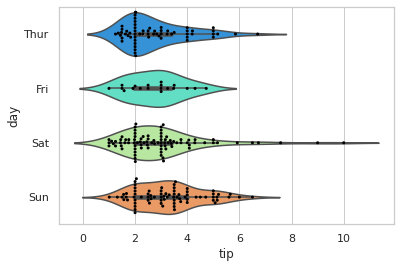

In [120]:
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3)

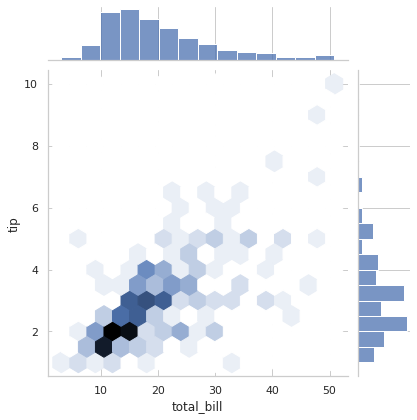

In [121]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

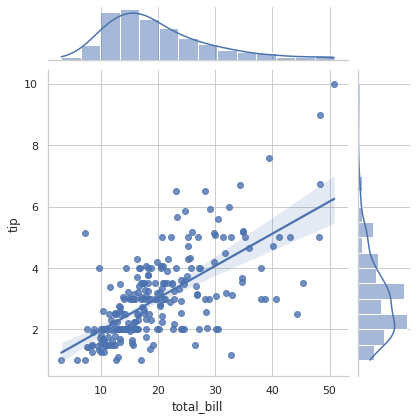

In [123]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

## **Evaluating Kernel Density Basis Functions And Plotting The KDE Plot**

Text(0.5, 0.98, 'Individual Basis Functions')

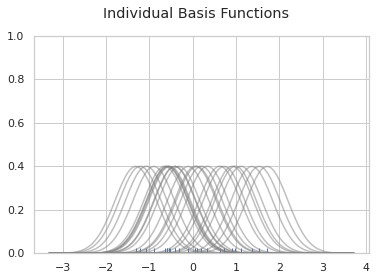

In [126]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Create dataset
dataset = np.random.randn(25)
# Create another rugplot
sns.rugplot(dataset);
# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2
# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)
# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

# Create an empty kernel list
kernel_list = []
# Plot each basis function
for data_point in dataset:
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    # Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)
plt.ylim(0,1)
plt.suptitle("Individual Basis Functions")

Text(0.5, 0.98, 'Sum of the Basis Functions')

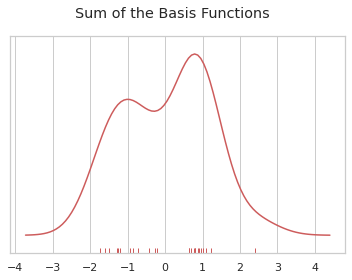

In [124]:
# To get the kernel density estimation 'kde' plot we can sum these basis functions.
# Plot the sum of the basis functions
sum_of_kde = np.sum(kernel_list,axis=0)
# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')
# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')
# Get rid of y-tick marks
plt.yticks([])
# Set title
plt.suptitle("Sum of the Basis Functions")

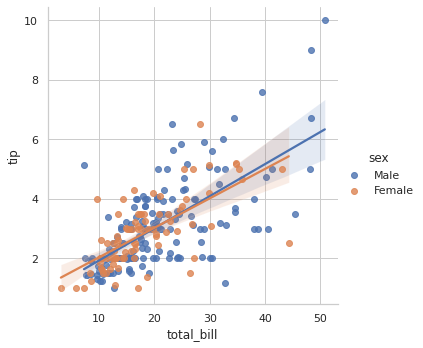

In [127]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

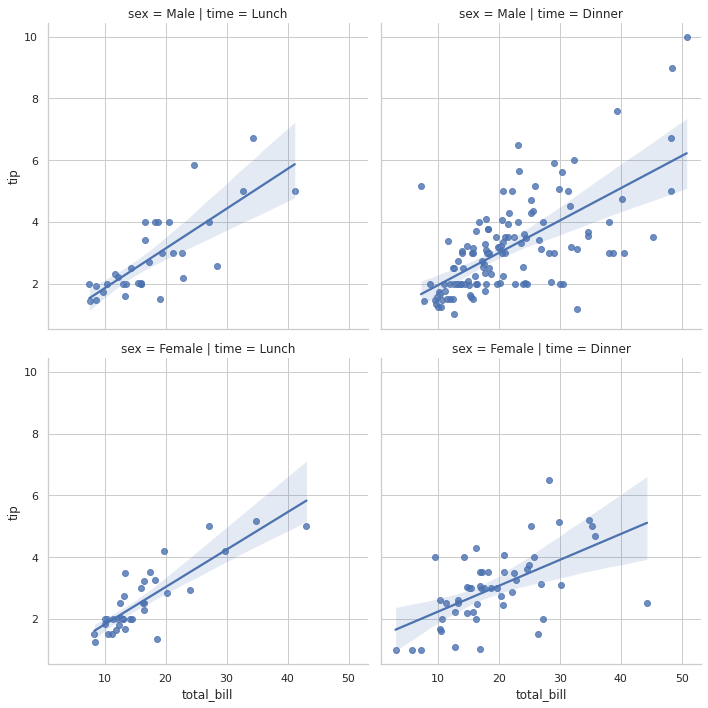

In [128]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips)